# Car Breakdown Prediction - Team 7

## 1. Introduction & Setup
Objective: Understand the factors influencing vehicle breakdown within the next 30 days and build a predictive model.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the dataset
train = pd.read_csv("train_CarBreakDown.csv")
test = pd.read_csv("test_CarBreakDown.csv")
pd.set_option('display.max_columns', None)

#### Interpretation

The dataset contains vehicle characteristics and maintenance information.
The target variable is `breakdown_next_30_days`.

## 2. Initial Data Inspection
Before analyzing the data, we must inspect it for missing values (NaNs). If we find any, we need to handle them before creating visualizations or training our Machine Learning models.

In [26]:
print("Data Shape:", train.shape)
print("\n--- Missing Values Count (Before Cleaning) ---")
print(train.isnull().sum())

# As we can see, there are multiple missing values. 
# We WILL NOT use train.dropna() because it would delete ~23% of our rows.

Data Shape: (1050, 14)

--- Missing Values Count (Before Cleaning) ---
id                            0
vehicle_brand                21
vehicle_age_years            16
mileage_km                   17
engine_hours                 15
last_service_km_ago          10
oil_quality_pct              36
avg_trip_length_km           12
weather_exposure             13
fuel_type                    14
cleanliness_score            55
driver_satisfaction_score    13
tyre_type                    17
breakdown_next_30_days        0
dtype: int64


## 3. Data Preprocessing (Data Cleaning)

Since we cannot graph or train models on data with missing values effectively, we will perform **Imputation**. 
* We use the **median** for numerical columns to avoid the influence of extreme outliers.
* We use the **mode** (most frequent value) for categorical/text columns.

In [27]:
# 1. Define columns by data type
numerical_cols = ['vehicle_age_years', 'mileage_km', 'engine_hours', 
                  'last_service_km_ago', 'oil_quality_pct', 'avg_trip_length_km', 
                  'cleanliness_score', 'driver_satisfaction_score']

categorical_cols = ['vehicle_brand', 'weather_exposure', 'fuel_type', 'tyre_type']

# 2. Impute Numerical Data with Median
for col in numerical_cols:
    median_val = train[col].median()
    train[col].fillna(median_val, inplace=True)
    test[col].fillna(median_val, inplace=True) # Apply exactly the same to test set

# 3. Impute Categorical Data with Mode
for col in categorical_cols:
    mode_val = train[col].mode()[0] 
    train[col].fillna(mode_val, inplace=True)
    test[col].fillna(mode_val, inplace=True)

# 4. Save the cleaned data into a new folder for the team to review
os.makedirs('cleaned_data', exist_ok=True)
train.to_csv('cleaned_data/train_imputed_clean.csv', index=False)
print("Cleaned data successfully saved to the 'cleaned_data' folder!")

# 5. Verification
print("\nMissing values after Imputation:\n", train.isnull().sum().sum())
print("Data Shape after Imputation:", train.shape) # Should still be 1050!

Cleaned data successfully saved to the 'cleaned_data' folder!

Missing values after Imputation:
 239
Data Shape after Imputation: (1050, 14)


C:\Users\jairo_z0gizjb\AppData\Local\Temp\ipykernel_30836\1783877779.py:11: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  train[col].fillna(median_val, inplace=True)
C:\Users\jairo_z0gizjb\AppData\Local\Temp\ipykernel_30836\1783877779.py:12: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chain

## 4. Exploratory Data Analysis (EDA)
Now that our data is 100% clean and free of NaNs, we can safely explore the relationships between our features and the target variable (`breakdown_next_30_days`).

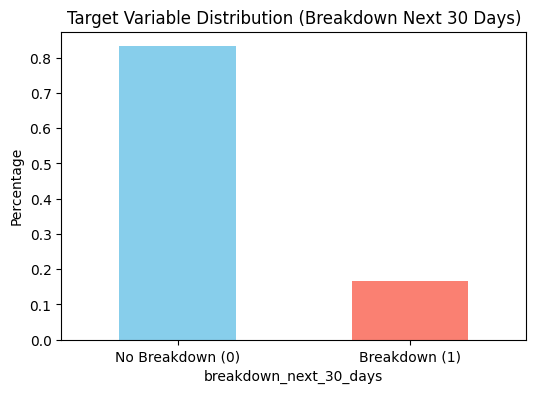

In [30]:
# Breakdown rate distribution
plt.figure(figsize=(6, 4))
train['breakdown_next_30_days'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Target Variable Distribution (Breakdown Next 30 Days)")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1], labels=['No Breakdown (0)', 'Breakdown (1)'], rotation=0)
plt.show()

### Insight 1 – Class Imbalance

Approximately 84% of vehicles do not break down,
while 16% experience a breakdown.

This indicates class imbalance.
Accuracy alone will not be sufficient for evaluation.

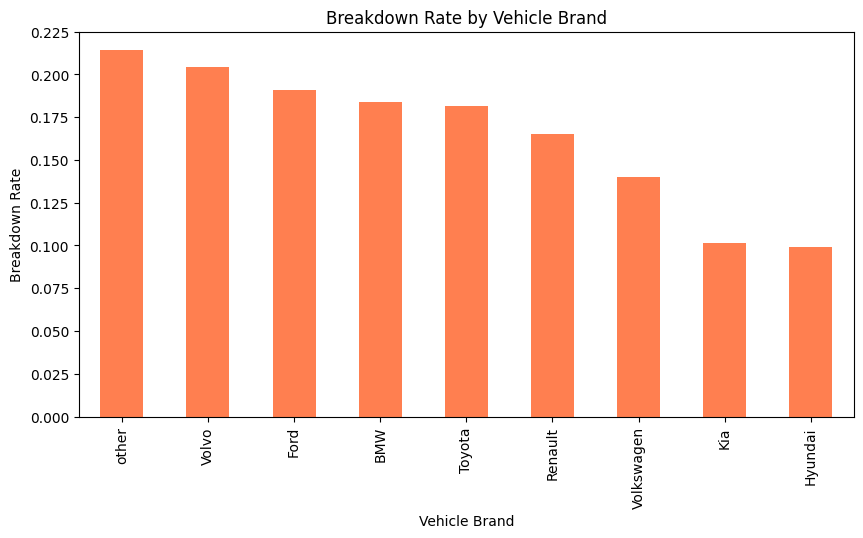

In [31]:
# Breakdown rate by vehicle brand
plt.figure(figsize=(10, 5))
train.groupby("vehicle_brand")["breakdown_next_30_days"].mean().sort_values(ascending=False).plot(kind="bar", color='coral')
plt.title("Breakdown Rate by Vehicle Brand")
plt.ylabel("Breakdown Rate")
plt.xlabel("Vehicle Brand")
plt.show()

Some brands (e.g., Volvo and Ford)
show higher breakdown rates.

Others (e.g., Hyundai and Kia)
show noticeably lower rates.

Brand appears to moderately influence reliability,
although it is not the dominant factor.

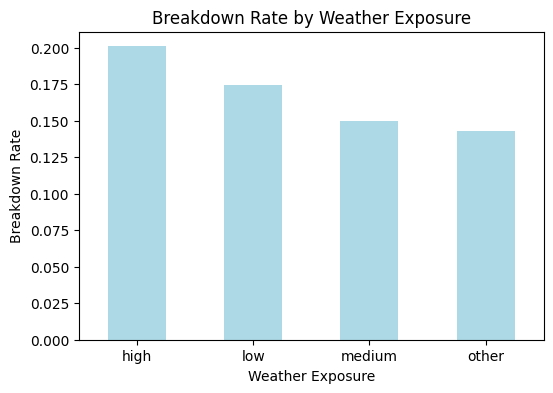

In [33]:
# Breakdown rate by weather exposure
plt.figure(figsize=(6, 4))
train.groupby("weather_exposure")["breakdown_next_30_days"].mean().plot(kind="bar", color='lightblue')
plt.title("Breakdown Rate by Weather Exposure")
plt.ylabel("Breakdown Rate")
plt.xlabel("Weather Exposure")
plt.xticks(rotation=0)
plt.show()

Vehicles exposed to all-season conditions show higher breakdown rates.
Environmental exposure contributes to mechanical stress.

## 5. Final EDA Summary

* **Imbalance:** Breakdown is a relatively rare event (~16% of the dataset).
* **Brand Impact:** Some brands (e.g., Volvo and Ford) show higher breakdown rates, while others (e.g., Hyundai and Kia) show noticeably lower rates. Brand appears to moderately influence reliability.
* **Environmental Impact:** Vehicles exposed to high or all-season weather conditions show higher breakdown rates, contributing to mechanical stress.
* **Conclusion:** No single feature explains failure on its own. Therefore, a non-linear model such as Random Forest is appropriate for capturing complex interactions between variables.

## 6. Machine Learning Modeling

## 7. Model Evaluation

## 8. GenAI Usage Report